In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
!"C:\Users\Tanvi Kamath\AppData\Local\Programs\Python\Python311\python.exe" -m pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip show matplotlib


Name: matplotlib
Version: 3.10.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

 1. This LICENSE AGREEMENT is between the Matplotlib Development Team
 ("MDT"), and the Individual or Organization ("Licensee") accessing and
 otherwise using matplotlib software in source or binary form and its
 associated documentation.

 2. Subject to the terms and conditions of this License Agreement, MDT
 hereby grants Licensee a nonexclusive, royalty-free, world-wide license
 to reproduce, analyze, test, perform and/or display publicly, prepare
 derivative works, distribute, and otherwise use matplotlib
 alone or in any derivative version, provided, however, that MDT's
 License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
 2012- Matplotlib Development Team; All Rights Reserved" are retained in
 matplotlib

In [22]:
import sys
print(sys.executable)


c:\Users\Tanvi Kamath\AppData\Local\Programs\Python\Python311\python.exe


In [23]:
! "C:/Users/Tanvi Kamath/AppData/Local/Programs/Python/Python311/python.exe" -m pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE_cleaned.csv')

In [25]:
!pip install matplotlib

In [26]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [27]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [28]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [30]:
x = df.drop('FWI',axis=1)
y = df['FWI']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((194, 10), (49, 10), (194,), (49,))

In [33]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000


<Axes: >

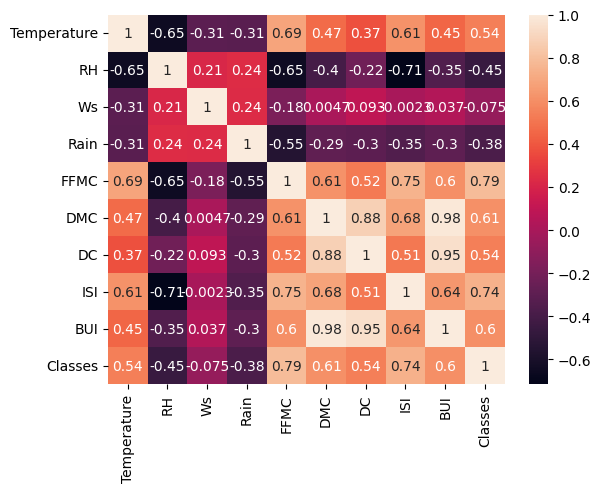

In [34]:
sns.heatmap(x_train.corr(), annot=True)

In [35]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):  
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(x_train,0.85)

In [37]:
corr_features

{'BUI', 'DC'}

In [38]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape, x_test.shape

((194, 8), (49, 8))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Mean Squared Error: 0.6973545616016176
R-squared: 0.9769913929101306
Mean Absolute Error: 0.5117893923448024


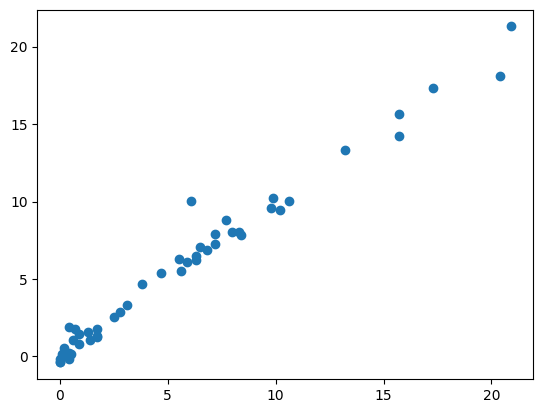

In [40]:
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)
y_pred = linreg.predict(x_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)

Lasso Mean Squared Error: 1.7260423250231411
Lasso R-squared: 0.9430507350726564


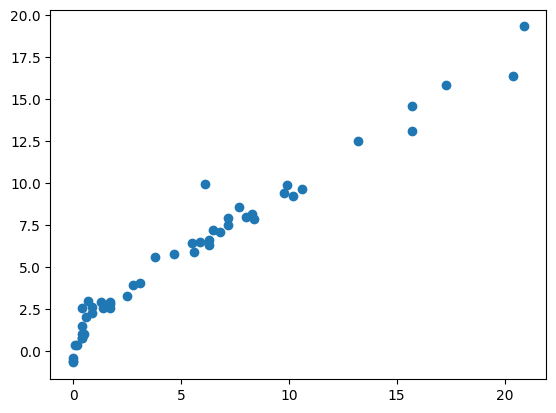

In [41]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
print("Lasso Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R-squared:", r2_score(y_test, y_pred_lasso))
plt.scatter(y_test, y_pred_lasso)

Ridge Mean Squared Error: 0.7132839611442701
Ridge R-squared: 0.976465816230152


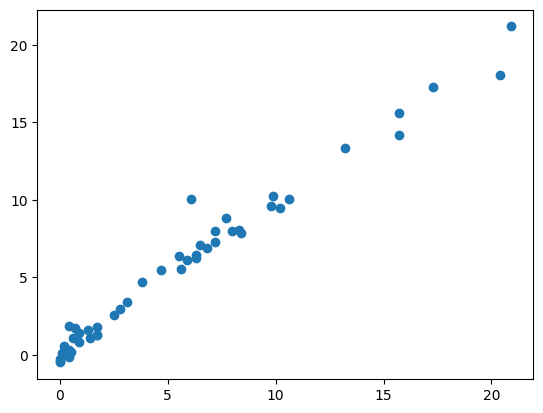

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
print("Ridge Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R-squared:", r2_score(y_test, y_pred_ridge))   
plt.scatter(y_test, y_pred_ridge)

In [43]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(x_train_scaled, y_train)

LassoCV(cv=5)

In [44]:
lasso_cv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

LassoCV Mean Squared Error: 0.8329297185058134
LassoCV R-squared: 0.9725182085529627


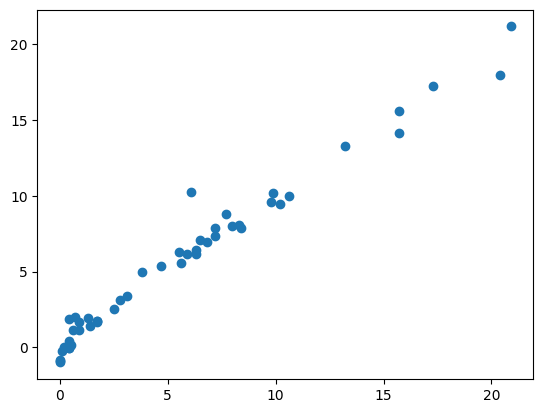

In [45]:
y_pred_lasso_cv = lasso_cv.predict(x_test_scaled)
print("LassoCV Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso_cv))
print("LassoCV R-squared:", r2_score(y_test, y_pred_lasso_cv))
plt.scatter(y_test, y_pred_lasso_cv)

RidgeCV Mean Squared Error: 0.9580732275173655
RidgeCV R-squared: 0.9683892073429021


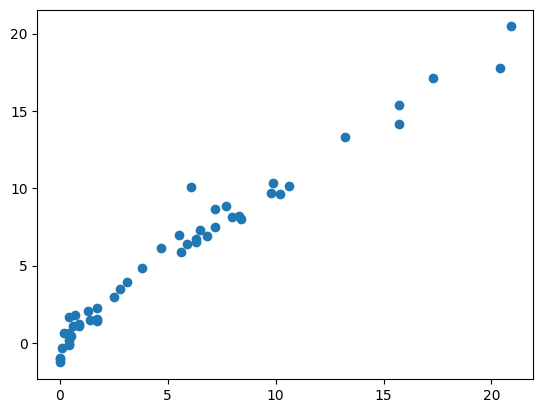

In [46]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(x_train_scaled, y_train)
y_pred_ridge_cv = ridge_cv.predict(x_test_scaled)
print("RidgeCV Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge_cv))
print("RidgeCV R-squared:", r2_score(y_test, y_pred_ridge_cv))
plt.scatter(y_test, y_pred_ridge_cv)

In [47]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

ElasticNetCV Mean Squared Error: 0.8225822491766823
ElasticNetCV R-squared: 0.9728596143015988


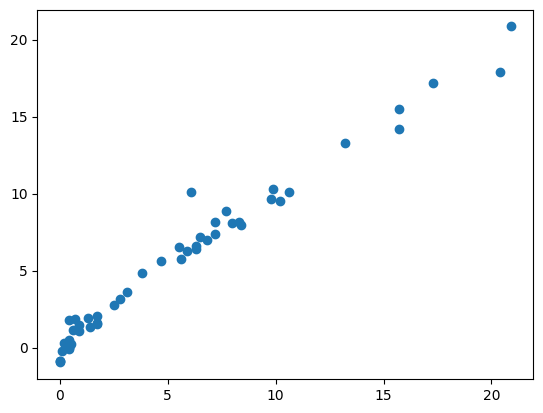

In [48]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(x_train_scaled, y_train)
y_pred_elastic_net_cv = elastic_net_cv.predict(x_test_scaled)
print("ElasticNetCV Mean Squared Error:", mean_squared_error(y_test, y_pred_elastic_net_cv))
print("ElasticNetCV R-squared:", r2_score(y_test, y_pred_elastic_net_cv))
plt.scatter(y_test, y_pred_elastic_net_cv)

In [49]:
## pickle the model and preprocessing models
import pickle


In [50]:
scaler

StandardScaler()

In [51]:
ridge

Ridge()

In [52]:
import pickle 
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge_model.pkl', 'wb'))

In [55]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


0.5

In [57]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [ ]:
!python -m pip install -r requirements.txt --force-reinstall


  Using cached flask-3.1.1-py3-none-any.whl (103 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached pandas-2.3.0-cp310-cp310-win_amd64.whl (11.1 MB)
  Using cached scikit_learn-1.7.0-cp310-cp310-win_amd64.whl (10.7 MB)
  Using cached click-8.2.1-py3-none-any.whl (102 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
  Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Using cached MarkupSafe-3.0.2-cp310-cp310-win_amd64.whl (15 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached packaging-25.0-py3-none-a

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Tanvi Kamath\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-13e2df515630b4a41f92893938845698.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\Tanvi Kamath\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install matplotlib seaborn --force-reinstall

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.0 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.7 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.4 MB/s eta 0:00:03
   